In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import PIL # para manipular imagens
import pickle 
import zipfile
 

In [14]:
arquivozip = '/content/drive/My Drive/curso_fundamentos_de_deep_learning_A/09_CNN-ConvolutionalNeuralNetworks/traffic-signs-data.zip'
objeto_zip = zipfile.ZipFile(file=arquivozip, mode='r')
objeto_zip.extractall('./') # vamos descompactar na mesma pasta
objeto_zip.close()

In [17]:
with open('traffic-signs-data/train.p', mode='rb') as dados_treino:
  treino = pickle.load(dados_treino)

In [19]:
with open('traffic-signs-data/test.p', mode='rb') as dados_teste:
  teste = pickle.load(dados_teste)

In [21]:
with open('traffic-signs-data/valid.p', mode='rb') as dados_validacao:
  validacao = pickle.load(dados_validacao)

In [25]:
validacao

{'coords': array([[  6,   5,  22,  20],
        [  6,   5,  22,  20],
        [  6,   5,  23,  21],
        ...,
        [ 10,   8,  99,  90],
        [ 10,  11, 112, 108],
        [ 13,  12, 138, 125]], dtype=uint8), 'features': array([[[[13, 12, 12],
          [12, 11, 12],
          [13, 11, 11],
          ...,
          [14, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         [[13, 12, 13],
          [12, 11, 12],
          [13, 12, 12],
          ...,
          [13, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         [[13, 12, 13],
          [12, 11, 12],
          [12, 12, 12],
          ...,
          [13, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         ...,
 
         [[16, 15, 15],
          [15, 14, 14],
          [15, 15, 15],
          ...,
          [13, 12, 12],
          [14, 13, 13],
          [14, 13, 13]],
 
         [[18, 16, 16],
          [17, 15, 15],
          [18, 16, 16],
          ...,
          [12, 11, 1

In [23]:
treino

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [26]:
teste

{'coords': array([[ 6,  5, 48, 49],
        [ 5,  5, 36, 40],
        [ 6,  6, 43, 47],
        ...,
        [ 6,  6, 24, 24],
        [ 5,  6, 43, 44],
        [ 6,  5, 27, 26]], dtype=uint8), 'features': array([[[[116, 139, 174],
          [116, 137, 171],
          [118, 138, 172],
          ...,
          [ 98, 114, 143],
          [ 97, 121, 147],
          [ 85, 105, 130]],
 
         [[115, 142, 176],
          [115, 140, 174],
          [117, 141, 175],
          ...,
          [119, 143, 176],
          [120, 141, 173],
          [120, 139, 171]],
 
         [[117, 141, 174],
          [117, 142, 175],
          [114, 140, 172],
          ...,
          [120, 144, 179],
          [122, 144, 179],
          [120, 143, 177]],
 
         ...,
 
         [[117, 137, 167],
          [115, 134, 164],
          [117, 135, 164],
          ...,
          [115, 137, 169],
          [116, 136, 168],
          [118, 139, 172]],
 
         [[116, 136, 166],
          [114, 134, 168],
     

In [28]:
X_treino, y_treino = treino['features'], treino['labels']

In [30]:
X_treino

array([[[[ 28,  25,  24],
         [ 27,  24,  23],
         [ 27,  24,  22],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  25],
         [ 31,  27,  26]],

        [[ 29,  26,  25],
         [ 27,  25,  23],
         [ 27,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        [[ 28,  26,  26],
         [ 27,  25,  23],
         [ 26,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        ...,

        [[ 27,  24,  23],
         [ 28,  25,  24],
         [ 30,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 29,  25,  22]],

        [[ 28,  23,  23],
         [ 29,  24,  24],
         [ 31,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 28,  24,  21]],

        [[ 29,  23,  23],
         [ 30,  24,  24],
         [ 32,  24,  23],
         ...,
         [ 27,  24,  22],
        

In [32]:
y_treino

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [33]:
X_teste, y_teste = teste['features'], teste['labels']

In [36]:
y_teste

array([16,  1, 38, ...,  6,  7, 10], dtype=uint8)

In [37]:
X_validacao, y_validacao = validacao['features'], validacao['labels']

In [40]:
# (34799 linhas , 32*32 pixels, 3 cores (RGB red green blue))
X_treino.shape

(34799, 32, 32, 3)

In [42]:
32*32*3 # 3072 pixels a idéia é detectar características fundamentais com menor dimensionalidade

3072

In [44]:
y_treino.shape

(34799,)

In [46]:
X_teste.shape

(12630, 32, 32, 3)

In [48]:
y_teste.shape

(12630,)

In [50]:
X_validacao.shape

(4410, 32, 32, 3)

In [52]:
y_validacao.shape

(4410,)

1

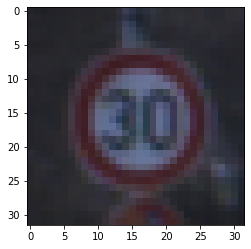

In [55]:
i=4000
plt.imshow(X_treino[i])
y_treino[i]

34

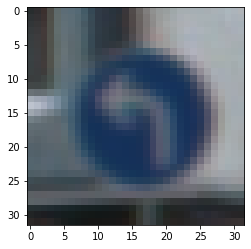

In [57]:
i=4001
plt.imshow(X_teste[i])
y_teste[i]

17

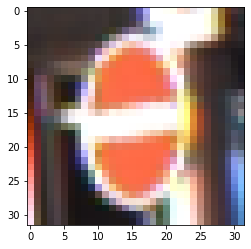

In [59]:
i=4002
plt.imshow(X_validacao[i])
y_validacao[i]

In [60]:
from sklearn.utils import shuffle
X_treino, y_treino = shuffle(X_treino, y_treino)

In [62]:
X_treino.shape

(34799, 32, 32, 3)

In [63]:
# Transformando em tons de cinza
# soma valor(0 a 255)  rgb red+green+blue e divide por 3
X_treino_cinza = np.sum(X_treino / 3, axis=3, keepdims=True)

In [65]:
X_treino_cinza.shape

(34799, 32, 32, 1)

In [67]:
X_treino_cinza

array([[[[ 69.        ],
         [ 64.66666667],
         [ 66.33333333],
         ...,
         [ 77.66666667],
         [ 83.66666667],
         [ 86.        ]],

        [[ 69.66666667],
         [ 65.        ],
         [ 64.33333333],
         ...,
         [ 77.        ],
         [ 81.        ],
         [ 86.66666667]],

        [[ 66.        ],
         [ 67.66666667],
         [ 68.        ],
         ...,
         [ 77.        ],
         [ 84.66666667],
         [125.66666667]],

        ...,

        [[ 56.66666667],
         [ 62.        ],
         [ 70.33333333],
         ...,
         [111.        ],
         [107.        ],
         [110.        ]],

        [[ 52.66666667],
         [ 62.        ],
         [ 69.        ],
         ...,
         [108.33333333],
         [109.66666667],
         [113.33333333]],

        [[ 58.66666667],
         [ 69.33333333],
         [ 70.66666667],
         ...,
         [117.66666667],
         [123.66666667],
         [113.333

In [68]:
X_teste_cinza = np.sum(X_teste / 3, axis=3, keepdims=True)

In [70]:
X_teste.shape

(12630, 32, 32, 3)

In [72]:
X_teste_cinza.shape

(12630, 32, 32, 1)

In [73]:
X_validacao_cinza = np.sum(X_validacao / 3, axis=3, keepdims=True)

In [75]:
X_validacao_cinza.shape

(4410, 32, 32, 1)

In [77]:
X_validacao.shape

(4410, 32, 32, 3)

In [79]:
# normalizar a imagem
#X_treino_cinza_normalizado =  (X_treino_cinza) / 255 
X_treino_cinza_normalizado =  (X_treino_cinza - 128) / 128 
X_teste_cinza_normalizado =  (X_teste_cinza - 128) / 128 
X_validacao_cinza_normalizado =  (X_validacao_cinza - 128) / 128 

In [83]:
X_validacao_cinza_normalizado

array([[[[-0.90364583],
         [-0.90885417],
         [-0.90885417],
         ...,
         [-0.90364583],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90364583],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90625   ],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        ...,

        [[-0.88020833],
         [-0.88802083],
         [-0.8828125 ],
         ...,
         [-0.90364583],
         [-0.89583333],
         [-0.89583333]],

        [[-0.86979167],
         [-0.87760417],
         [-0.86979167],
         ...,
         [-0.91145833],
         [-0.90364583],
         [-0.89583333]],

        [[-0.86197917],
         [-0.86979167],
         [-0.86197917],
         ...,
         [-0.90625   ],
         [-0.8984375 ],
         [-0.88802083]]],


       [[[-0.90104167],


In [85]:
np.max(X_treino_cinza_normalizado)

0.9921875

In [87]:
np.min(X_treino_cinza_normalizado)

-0.9713541666666666

In [92]:
X_treino_cinza_normalizado[0].shape

(32, 32, 1)

In [94]:
X_treino_cinza_normalizado[0].squeeze().shape

(32, 32)

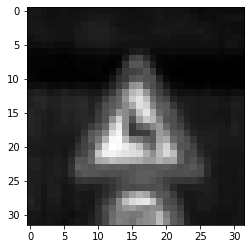

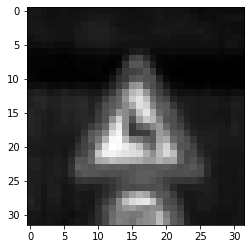

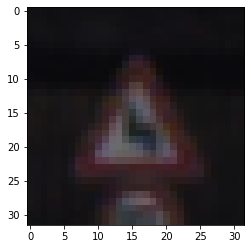

In [101]:
indice=70
plt.imshow(X_treino_cinza_normalizado[indice].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_treino_cinza[indice].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_treino[indice].squeeze())

# Vamos usar arquitetura LENET

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6
    - 6 filtros de características com kernel 5x5 strides = (1,1)

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

    

In [105]:
from tensorflow.keras import layers, models

LeNet = models.Sequential()

#STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
# Input = 32x32x1  input_shape=(32,32,1)
#    Apply a RELU Activation function to the output   activation='relu'
# Stride é 1x1   strides=(1,1) 
#    Output = 28x28x6
#    Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
LeNet.add(layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1) ,activation='relu', input_shape=(32,32,1) ) )
# A saída gerada será 28x28x6


# A entrada desta camada será 28x28x6
# A saída desta camada será 14x14x6
LeNet.add(layers.AveragePooling2D())


# STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
# Entrada para esta camada será 14x14x6
# Saída será Output = 10x10x16
LeNet.add(layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1) ,activation='relu' ) )


# Entrada  = 10x10x16
# Saída =  5x5x16 
LeNet.add(layers.AveragePooling2D())


# STEP 3: FLATTENING THE NETWORK
#Flatten the network with Input = 5x5x16 and Output = 400
LeNet.add(layers.Flatten())

# -- finalizou parte arquitetura CNN


# Entrada da rede neural densa 400
# Rede neural densa
#STEP 4: FULLY CONNECTED LAYER
#    Layer 3: Fully Connected layer with Input = 400 and Output = 120
#    Apply a RELU Activation function to the output
# Se a saída é 120 significa que preciso adicionar units=120 que é a camada oculta
LeNet.add( layers.Dense( units=120, activation='relu'  ) )


#STEP 5: ANOTHER FULLY CONNECTED LAYER
#    Layer 4: Fully Connected Layer with Input = 120 and Output = 84
#    Apply a RELU Activation function to the output. parâmetro activation='relu'
# Se saída é 84 então units=84 que é uma camada oculta
LeNet.add( layers.Dense( units=84, activation='relu'  ) )

#STEP 6: FULLY CONNECTED LAYER
#    Layer 5: Fully Connected layer with Input = 84 and Output = 43
# Como temos 43 possibilidades de placas logo será softmax
LeNet.add( layers.Dense( units=43, activation='softmax'  ) )

In [107]:
LeNet.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [110]:
# Se não usar One Hot Encoder(0000000001) e possuir  classes/alvos por exemplo de 0 a 9

LeNet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [111]:
X_treino_cinza_normalizado.shape

(34799, 32, 32, 1)

In [112]:
epocas=50
historico_epocas = LeNet.fit(X_treino_cinza_normalizado, y_treino, batch_size=500, epochs=epocas, 
                             validation_data=(X_validacao_cinza_normalizado, y_validacao))

Epoch 1/3
70/70 [==============================] - 17s 239ms/step - loss: 3.1712 - accuracy: 0.1770 - val_loss: 2.7932 - val_accuracy: 0.2912
Epoch 2/3
70/70 [==============================] - 16s 234ms/step - loss: 1.7418 - accuracy: 0.5208 - val_loss: 1.5621 - val_accuracy: 0.5497
Epoch 3/3
70/70 [==============================] - 16s 234ms/step - loss: 0.9879 - accuracy: 0.7136 - val_loss: 1.1529 - val_accuracy: 0.6601


In [113]:
LeNet.evaluate(X_teste_cinza_normalizado, y_teste)

395/395 [==============================] - 4s 11ms/step - loss: 1.3446 - accuracy: 0.6487


[1.344635009765625, 0.6486935615539551]

In [118]:
historico_epocas.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [120]:
historico_epocas.history['accuracy']

[0.17698784172534943, 0.520848274230957, 0.7136412262916565]

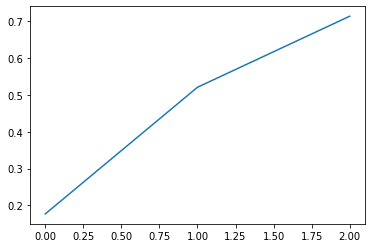

In [123]:
plt.plot(historico_epocas.history['accuracy'])

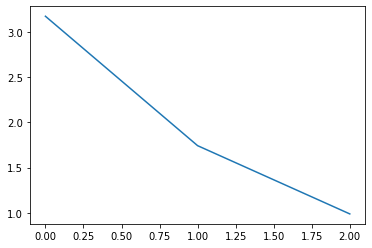

In [125]:
plt.plot(historico_epocas.history['loss'])

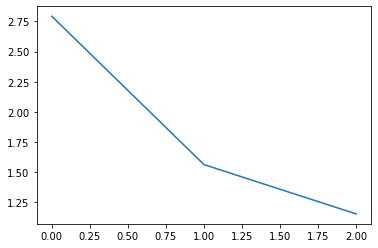

In [126]:
plt.plot(historico_epocas.history['val_loss'])

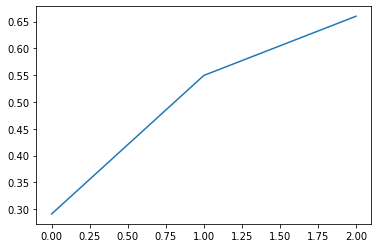

In [127]:
plt.plot(historico_epocas.history['val_accuracy'])

In [130]:
predicao_classes = LeNet.predict_classes(X_teste_cinza_normalizado)

In [132]:
predicao_softmax = LeNet.predict(X_teste_cinza_normalizado)

In [133]:
predicao_softmax[0]

array([1.7718873e-08, 1.2377720e-08, 7.3588620e-09, 2.5170918e-08,
       1.4898598e-09, 2.8034035e-06, 7.9980047e-08, 8.3156902e-04,
       1.3091689e-07, 1.0840240e-02, 3.5368348e-06, 1.3749128e-07,
       3.8417195e-07, 4.3208277e-11, 2.1115362e-17, 1.8875911e-10,
       9.8810005e-01, 1.6335291e-19, 5.8229968e-08, 2.8554475e-10,
       1.2307942e-08, 1.0276268e-10, 2.8797948e-16, 1.1572032e-07,
       3.5137479e-10, 4.6269721e-13, 1.3812790e-09, 6.7909262e-08,
       3.4358254e-09, 8.3504488e-12, 2.5360294e-09, 2.6146182e-11,
       7.2088284e-08, 2.2349142e-14, 2.6362260e-11, 5.9484490e-10,
       4.9965676e-10, 1.1776111e-07, 2.9653312e-13, 8.0179859e-15,
       1.9280119e-04, 2.2676850e-05, 5.1205197e-06], dtype=float32)

In [135]:
predicao_classes[0]

16

In [137]:
from sklearn.metrics import classification_report

print(classification_report(predicao_classes, y_teste))

              precision    recall  f1-score   support

           0       0.02      0.07      0.03        14
           1       0.62      0.74      0.67       603
           2       0.56      0.43      0.49       978
           3       0.73      0.50      0.59       655
           4       0.72      0.61      0.66       781
           5       0.49      0.40      0.44       761
           6       0.68      0.63      0.65       163
           7       0.52      0.37      0.43       622
           8       0.07      0.46      0.12        67
           9       0.86      0.61      0.71       678
          10       0.84      0.77      0.80       718
          11       0.60      0.84      0.70       299
          12       0.66      0.76      0.71       596
          13       0.97      0.83      0.89       840
          14       0.82      0.80      0.81       275
          15       0.44      0.85      0.58       110
          16       0.84      0.94      0.89       134
          17       0.89    

In [139]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(predicao_classes, y_teste))


[[  1  10   0 ...   0   0   0]
 [ 42 445  43 ...   1   0   0]
 [  2 147 423 ...   0   0   0]
 ...
 [  0   0   0 ...  36   0   0]
 [  0   0   0 ...   0  31  28]
 [  0   0   0 ...   0   0  16]]


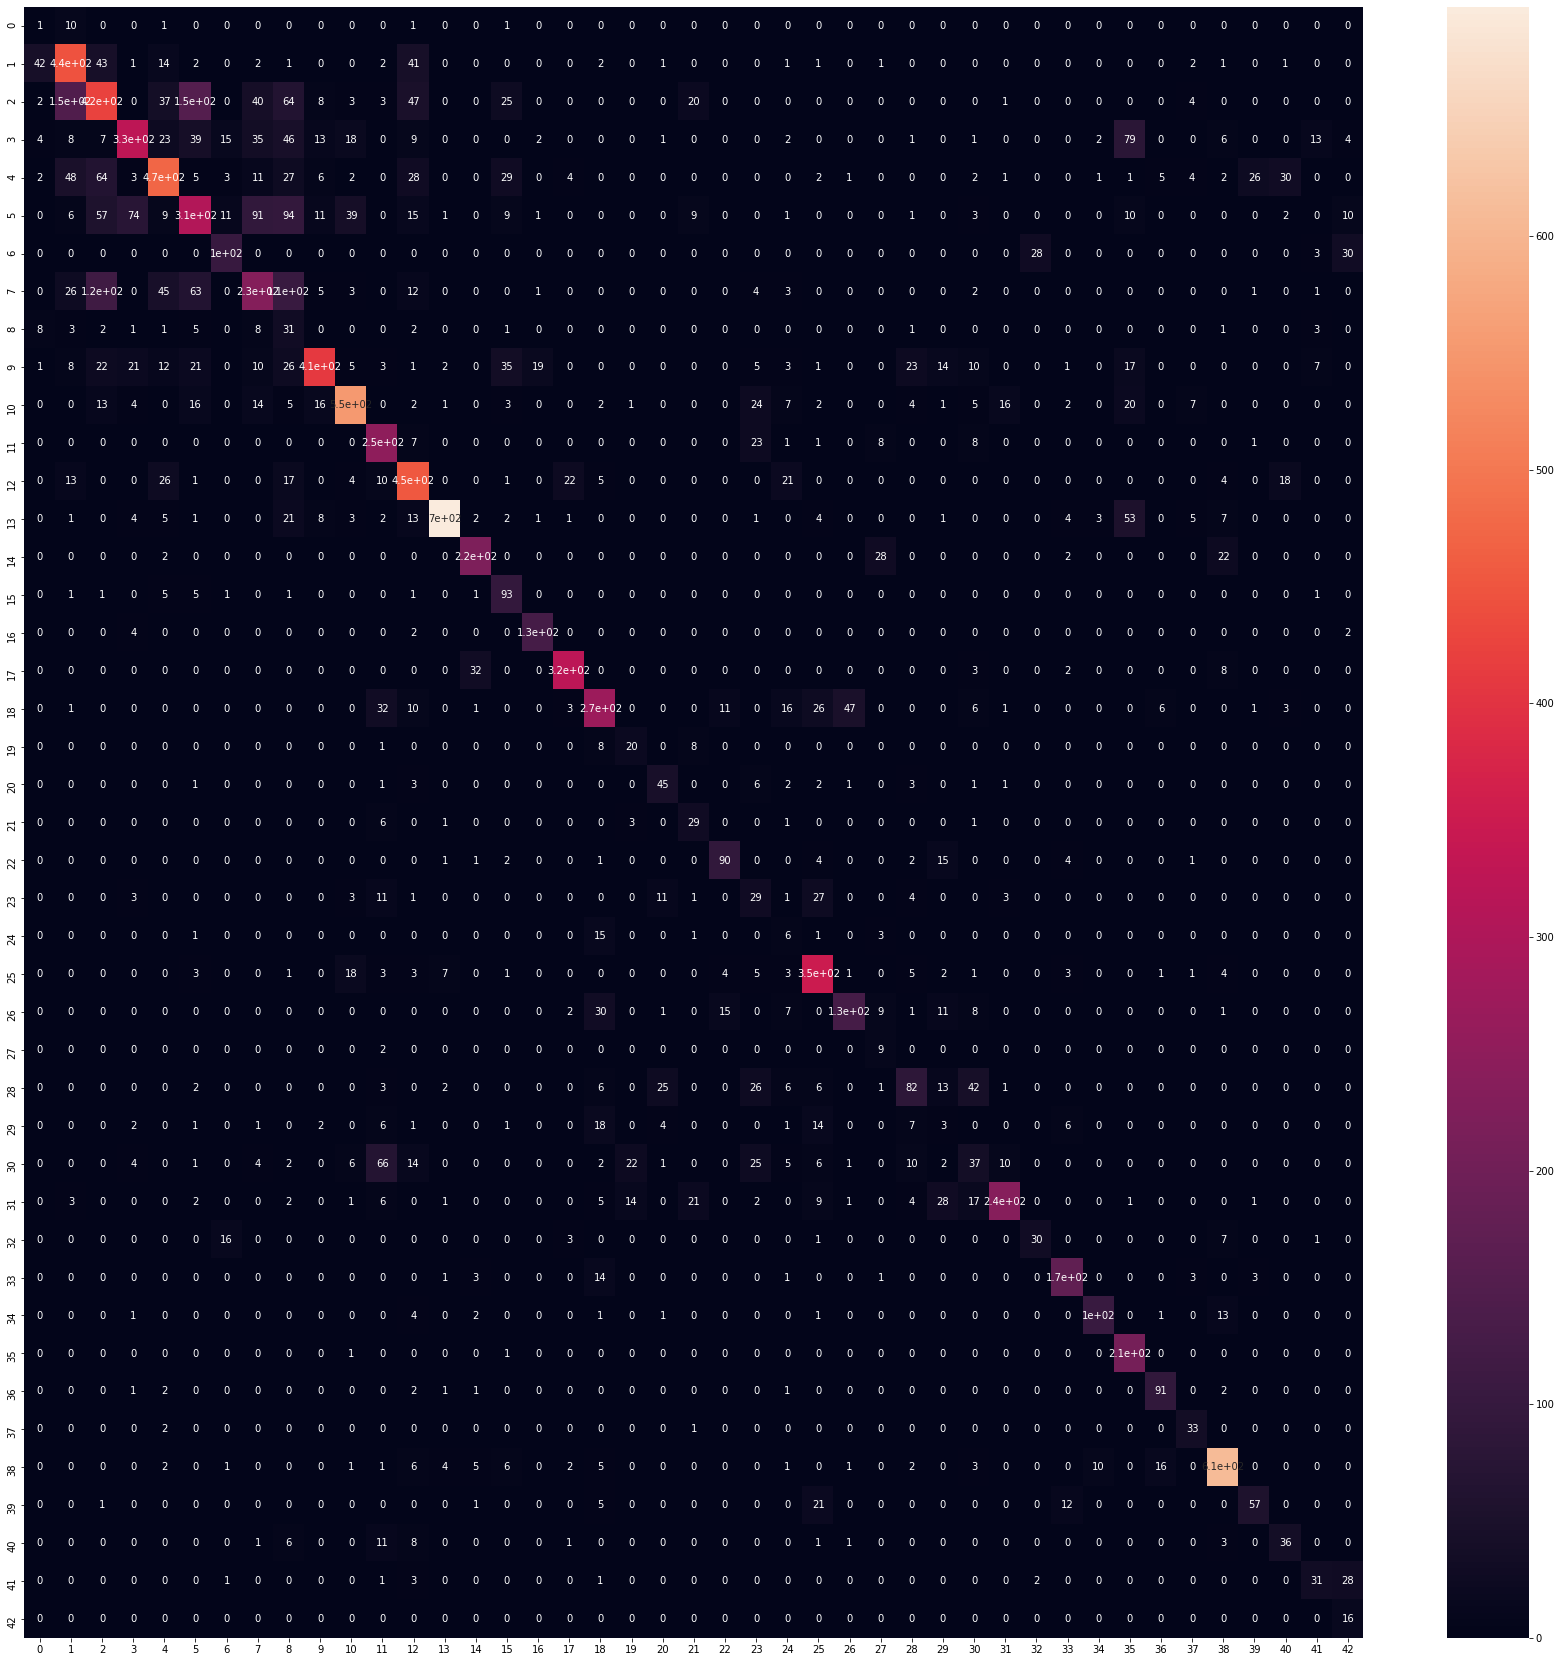

In [142]:
plt.figure(figsize=(30,30))
sns.heatmap(confusion_matrix(predicao_classes, y_teste),annot=True)

In [147]:
#imagem = '/content/drive/My Drive/curso_fundamentos_de_deep_learning_A/09_CNN-ConvolutionalNeuralNetworks/placa1.png'
placa_teste  =  tf.keras.preprocessing.image.load_img(r'/content/drive/My Drive/curso_fundamentos_de_deep_learning_A/09_CNN-ConvolutionalNeuralNetworks/placa1.png', target_size=(32,32))

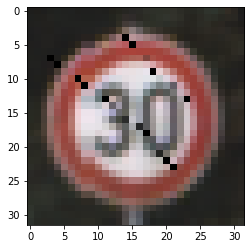

In [149]:
plt.imshow(placa_teste)

In [151]:
placa_teste_array = tf.keras.preprocessing.image.img_to_array(placa_teste)

In [153]:
placa_teste_array.shape

(32, 32, 3)

In [154]:
placa_teste_array = np.expand_dims(placa_teste_array, axis=0)

In [159]:
placa_teste_array.shape

(1, 32, 32, 3)

In [161]:
placa_teste_cinza = np.sum(placa_teste_array/3, axis=3, keepdims=True)

In [163]:
placa_teste_cinza.shape

(1, 32, 32, 1)

In [165]:
placa_teste_cinza_normalizar = (placa_teste_cinza - 128) / 128

In [168]:
placa_teste_cinza_normalizar.shape

(1, 32, 32, 1)

In [170]:
placa_teste_cinza_normalizar.squeeze().shape

(32, 32)

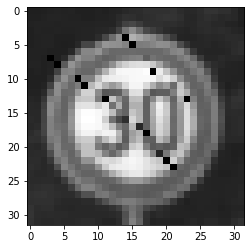

In [174]:
plt.imshow(placa_teste_cinza_normalizar.squeeze(), cmap='gray')

In [175]:
predicao_placa_teste = LeNet.predict_classes(placa_teste_cinza_normalizar)

In [177]:
predicao_placa_teste

array([1])

In [179]:
predicao_placa_teste_probabilidades = LeNet.predict(placa_teste_cinza_normalizar)

In [180]:
predicao_placa_teste_probabilidades

array([[8.7875116e-04, 8.7131971e-01, 1.1944214e-01, 3.1723428e-04,
        1.8950532e-03, 1.5283906e-03, 2.0387277e-05, 9.0538251e-04,
        3.3954193e-03, 5.6952656e-09, 4.9536004e-07, 7.8666726e-09,
        2.6652642e-04, 9.5419372e-10, 2.3828379e-08, 1.3541408e-09,
        6.2078875e-09, 6.3337180e-10, 1.8473497e-13, 8.5925524e-09,
        2.6109404e-10, 3.4264842e-09, 5.3906384e-16, 5.1019127e-09,
        1.2613870e-09, 8.2521233e-11, 6.6887662e-11, 4.6657949e-09,
        1.6644520e-10, 7.9856797e-09, 4.3595629e-09, 3.7195427e-08,
        6.3881816e-06, 8.1865226e-09, 9.4906331e-12, 6.4802580e-10,
        2.3340235e-08, 5.1587580e-08, 9.0213392e-12, 1.1645174e-10,
        2.3668810e-05, 7.0577521e-08, 2.5444194e-07]], dtype=float32)